In [1]:

import os
import json

import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
kaggle_config = json.load(open("kaggle (1).json"))

In [3]:
kaggle_config.keys()

dict_keys(['username', 'key'])

In [4]:

# Set the environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_config['username']
os.environ['KAGGLE_KEY'] = kaggle_config['key']
     

In [5]:
# !kaggle datasets download notshrirang/spotify-million-song-dataset

In [6]:
!dir

 Volume in drive D has no label.
 Volume Serial Number is D206-C8F4

 Directory of d:\JUPYTER\DEPLOYING Streamlit App\MUSIC RECOMENDATION APP

07/27/2025  03:22 PM    <DIR>          .
07/27/2025  03:15 PM    <DIR>          ..
07/27/2025  03:13 PM                68 kaggle (1).json
11/21/2022  04:49 PM        21,735,868 spotify-million-song-dataset.zip
07/27/2025  03:22 PM        74,864,162 spotify_millsongdata.csv
07/28/2025  02:59 PM           378,179 System_model_code.ipynb
               4 File(s)     96,978,277 bytes
               2 Dir(s)  207,603,064,832 bytes free


In [7]:
# with zipfile.ZipFile('spotify-million-song-dataset.zip', 'r') as zip_ref:
#     zip_ref.extractall()

In [8]:
# loading the dataset to a pandas dataframe
df = pd.read_csv("D:\JUPYTER\DEPLOYING Streamlit App\MUSIC RECOMENDATION APP\spotify_millsongdata.csv")

Initial Understanding

In [9]:
df.shape

(57650, 4)

In [10]:
df.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [12]:
df.isnull().sum()

artist    0
song      0
link      0
text      0
dtype: int64

In [13]:
# Top artists and songs
top_artists = df['artist'].value_counts().head(10)
print("\nTop 10 Artists:")
print(top_artists)


Top 10 Artists:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Alabama             187
Cher                187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [14]:
df = df.sample(10000)

df = df.drop('link', axis=1).reset_index(drop=True)

In [15]:
df.shape

(10000, 3)

In [16]:
df.head()

,artist,song,text
0,Regine Velasquez,Fast,I can't believe what's happening to me \r\nMy...
1,Louis Armstrong,Lazy River,Up a lazy river by the old mill stream \r\nTh...
2,Backstreet Boys,Soldier,Wanna be there just in time \r\nWanna be your...
3,Wanda Jackson,I've Gotta Sing,The sun's shining beautiful and everything is ...
4,Howard Jones,The Voices Are Back,He saw flames in the department store \r\nHe ...


In [17]:
# work cloud for song lyrics
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_lyrics)

<function matplotlib.pyplot.show(close=None, block=None)>

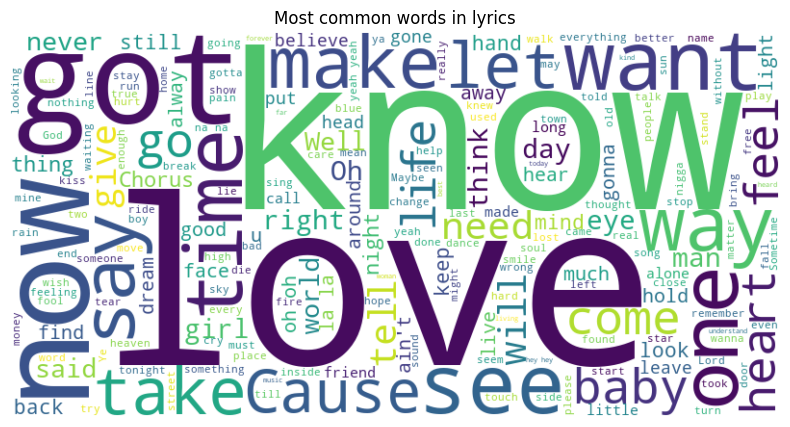

In [18]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most common words in lyrics")
plt.show

DATA PRE-PROCESSING

In [19]:
# downloading nltk data 
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\borne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\borne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\borne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
stop_words = set(stopwords.words('english'))

In [21]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [22]:
# Apply preprocessing to lyrics
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [23]:
df.head()

,artist,song,text,cleaned_text
0,Regine Velasquez,Fast,I can't believe what's happening to me \r\nMy...,cant believe whats happening heart leaps hear ...
1,Louis Armstrong,Lazy River,Up a lazy river by the old mill stream \r\nTh...,lazy river old mill stream lazy hazy river dre...
2,Backstreet Boys,Soldier,Wanna be there just in time \r\nWanna be your...,wan na time wan na shining knight protect like...
3,Wanda Jackson,I've Gotta Sing,The sun's shining beautiful and everything is ...,suns shining beautiful everything going way iv...
4,Howard Jones,The Voices Are Back,He saw flames in the department store \r\nHe ...,saw flames department store tried get people s...


In [24]:
#Vectorizarion with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])


In [26]:
# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [27]:
# Recommendation Function
def recommend_songs(song_name, cosine_sim=cosine_sim, df=df, top_n=5):
    # Find the index of the song
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song not found in the dataset!"   # can be reworked to compare for songs not present in the dataset
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Get song indices
    song_indices = [i[0] for i in sim_scores]

    # Return top n similar songs
    return df[['artist', 'song']].iloc[song_indices]

In [28]:
df["song"][2]

'Soldier'

In [29]:
# Example Recommendation
print("\nRecommendations for the song 'Blinded By Rainbows':")
recommendations = recommend_songs("For The First Time") # df["song"][2]
print(recommendations)


Recommendations for the song 'Blinded By Rainbows':
               artist                      song
7560    George Strait  Last Time The First Time
7688      Leann Rimes        For The First Time
3877  John Mellencamp           I Saw You First
3073       Bruno Mars                First Time
8244            Adele                First Love
